In [28]:
# This part is code from class
import requests
from bs4 import BeautifulSoup

def extract_main_body_text(page_title, language='en'):
    # Lets construct our URL with our language and page title input parameters
    emoji_url = f'https://www.emojiall.com/en/emoji/{page_title}'
    
    # Make a request to the wikipdia server and check to see we get a response
    response = requests.get(emoji_url)
    if response.status_code != 200:
        return "Failed to retrieve the page."

    # Use beatiful soup to parse the HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Empty string to put our content
    main_body_text = ""
    # Get the text from the main body using this specific tag
    main_content = soup.select('div.emoji_card_content')
    
    
    # If we have retrieve content
    if main_content:
        # Find each paragraph
        for paragraph in main_content:
            # And add that paragraph to our main_body_text string
            main_body_text += paragraph.get_text()
            #Add a new line after each paragraph
            main_body_text += '\n'

    return main_body_text

In [194]:
page_title = "🐱" 
emoji_url = f'https://www.emojiall.com/en/emoji/{page_title}'

response = requests.get(emoji_url)

soup = BeautifulSoup(response.text, 'html.parser')

divs = soup.findAll('div')

len(soup.find_all("div", {"class": "emoji_card_content"}))

response.text

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en" version="XHTML+RDFa 1.0" dir="ltr" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xmlns:skos="http://www.w3.org/2004/02/skos/core#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#">\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="Generator" content="Drupal 7 (http://drupal.org)" />\n<meta name="description" content="The 🐱 Cat Face emoji or Kitty emoji, this charming character shows a cartoon-style face of a cat, has round, open eyes and a small, triangular nose. The colorat" />\n<meta name="keywords" content="🐱,🐱 meaning,cat face,cat face Emoji Symbol,cat,face,pet" />\n<script type="appl

In [195]:
main_body_text = extract_main_body_text(page_title)
print(main_body_text)

file_name = f"../data/emoji/{page_title}.txt"
with open(file_name, "a") as myfile:
    myfile.write(main_body_text)


The 🐱 Cat Face emoji or Kitty emoji, this charming character shows a cartoon-style face of a cat, has round, open eyes and a small, triangular nose. The coloration can vary, but it's often a light color like yellow or tan. It's like having a little pet right on your screen📱!

This emoji literally indicate cats, but it also often represents qualities associated with them: independence, grace, mystery, and a bit of capricious charm. Whether you're a cat lover, feeling a little playful, or just want to add some feline charm to your messages, this emoji is the purr-fect choice.

You can use it on social media to express your love for cats, to comment on someone’s cute cat photo, or to show your playful or feeling 'pawsitively🐾' happy. And it is not just about signifying our love for cats, it's also developed a hidden meaning, symbolizing a playful or mysterious nature, much like our feline companions. When someone posts a photo with the 🐱 emoji, they might be feeling a little mischievous 

In [193]:
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer

file_path = f'../data/emoji/{page_title}.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

text_data = re.sub(r'[^\w\s]', '', text_data)

stop_words = ['emoji', 'download', 'view', 'name', 'classification', 'used', 'often', 'apple', 'microsoft', 'unicode', 'symbol']
vectorizer = CountVectorizer(stop_words=stop_words)

word_freq = Counter(word for word in text_data.split() if word.lower() not in stop_words)

sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

for word, freq in sorted_word_freq.items():
    print(f"{word}: {freq}")

new_text_data = ' '.join([word for word in text_data.split() if word.lower() not in stop_words])

with open(file_path, 'w', encoding='utf-8') as file:
    file.write(new_text_data)


cat: 35
a: 21
the: 18
of: 16
and: 16
to: 16
cats: 13
in: 11
as: 11
is: 10
or: 9
face: 8
with: 8
it: 7
can: 6
like: 5
pet: 5
for: 5
species: 5
are: 5
million: 5
The: 4
small: 4
on: 4
your: 4
domestic: 4
It: 4
by: 4
was: 4
Cat: 3
but: 3
its: 3
little: 3
feeling: 3
playful: 3
be: 3
Felis: 3
catus: 3
from: 3
well: 3
around: 3
Kitty: 2
this: 2
has: 2
eyes: 2
Its: 2
also: 2
charm: 2
just: 2
feline: 2
social: 2
love: 2
cute: 2
photo: 2
our: 2
developed: 2
meaning: 2
their: 2
Animals: 2
Nature: 2
Mammal: 2
mammal: 2
domesticated: 2
family: 2
A: 2
feral: 2
human: 2
Domestic: 2
60: 2
other: 2
body: 2
that: 2
at: 2
too: 2
made: 2
kittens: 2
BC: 2
ancient: 2
Egypt: 2
As: 2
owned: 2
United: 2
Mačka: 2
Kat: 2
silvestris: 2
mačka: 2
Kucing: 2
Copy: 2
Version: 2
Categories: 2
dog: 2
grinning: 2
smiling: 2
Face: 1
charming: 1
character: 1
shows: 1
cartoonstyle: 1
round: 1
open: 1
triangular: 1
nose: 1
coloration: 1
vary: 1
light: 1
color: 1
yellow: 1
tan: 1
having: 1
right: 1
screen: 1
This: 1
literall

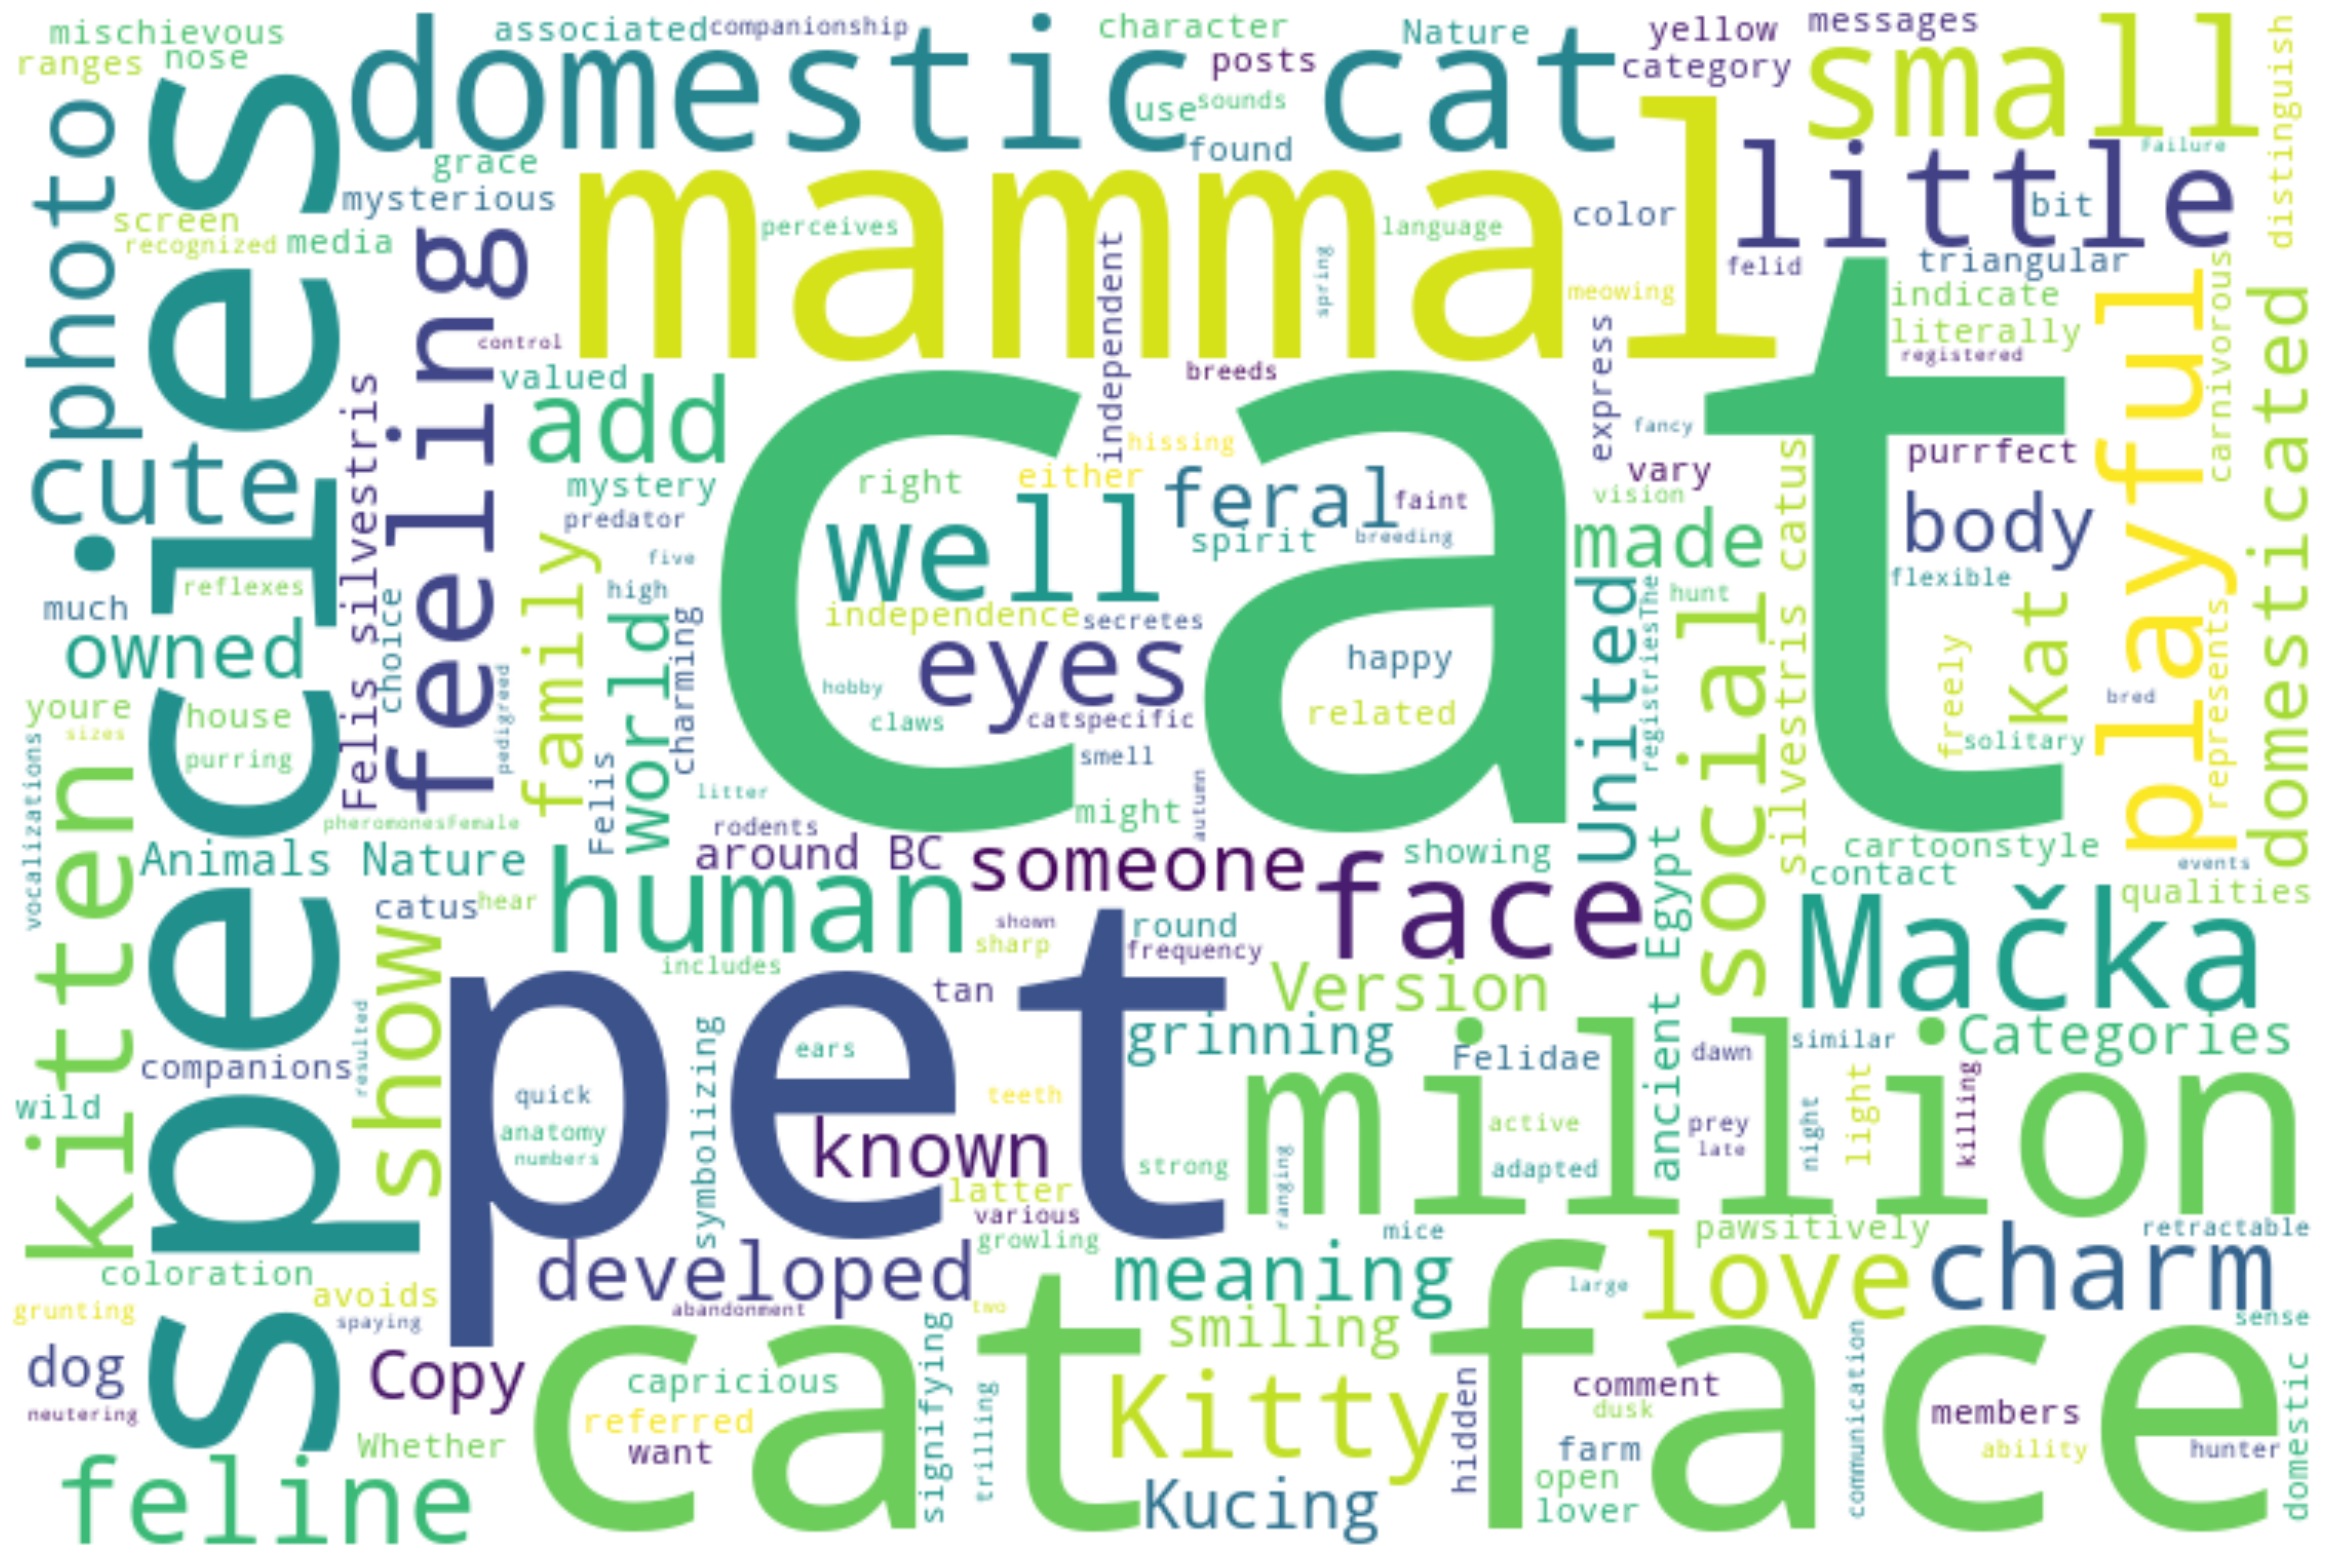

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

wordcloud = WordCloud(width=750, height=500, background_color='white').generate(text_data)

plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
